# Titanic : Machine Learning
## 1. Predict survival on the Titanic

### 2. Import Data

In [1]:
import pandas as pd

train = pd.read_csv("C:/Users/queenSSH/Desktop/학교/수학과/파이썬 및 머신러닝/datasets/train.csv")
test = pd.read_csv("C:/Users/queenSSH/Desktop/학교/수학과/파이썬 및 머신러닝/datasets/test.csv")

### 3. Exploratory data analysis
**Let's briefly see our data**

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Summary of data**
+ Survived = Survived : 1, Not Survived = Survived : 0
+ pclass : Class of Ticket 1 = 1st, 2 = 2nd, 3 = 3rd
+ sibsp : # of siblings
+ parch : # of parents and children
+ ticket : number of ticket
+ cabin : cabin number
+ fare : price of ticket 
+ embarked : Port of Embarkation C, Q, S

#### Bar Chart

Let's compare the survivals and unsurvivals for some of the Categorical Features

The features we will use are :
+ Pclass
+ Sex
+ SibSp
+ Parch
+ Embarked

In [4]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked = True, figsize = (10,5))

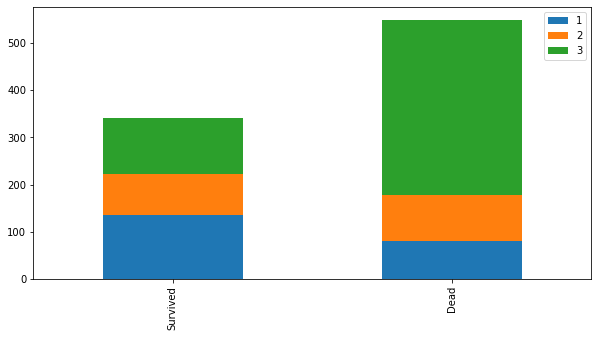

In [5]:
bar_chart('Pclass')

3rd class people were more likely to be unsurvived than other classes

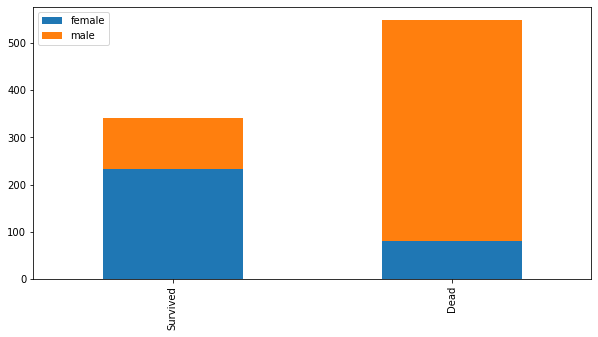

In [6]:
bar_chart('Sex')

Women were more likely to be survived than Men

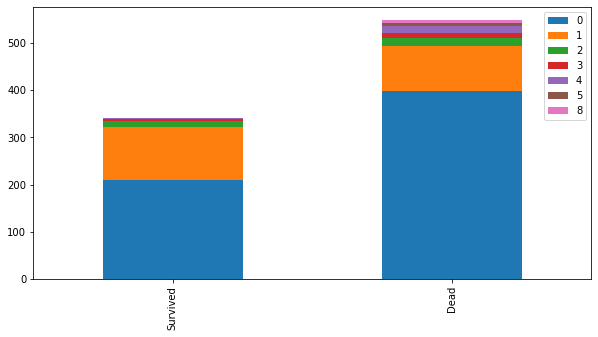

In [7]:
bar_chart('SibSp')

People who aboarded alone, were more likely to be dead

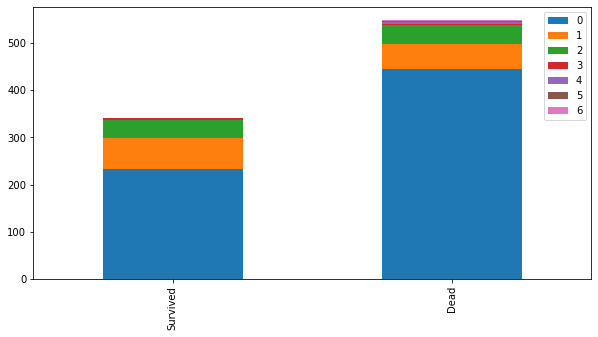

In [8]:
bar_chart('Parch')

People aboarded with parents or children were more likely to be survived

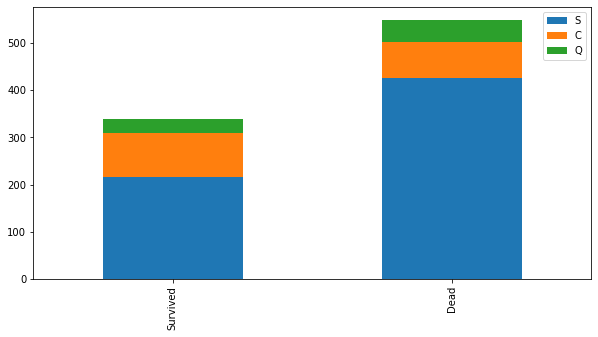

In [9]:
bar_chart('Embarked')

We cannot conclude anything about survivals comparing with "Embarked"

### 4. Feature Engineering

We will convert our feature to make machine learning algorithms work

#### 4.1 NameTitle

In [10]:
#Bring out the Title from Name

train_test_data = [train,test]

for dataset in train_test_data:
    dataset["NameTitle"] = dataset["Name"].str.extract('([A-Xa-z]+)\.', expand = False)

In [11]:
train["NameTitle"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Sir           1
Countess      1
Don           1
Capt          1
Jonkheer      1
Mme           1
Ms            1
Lady          1
Name: NameTitle, dtype: int64

In [12]:
test["NameTitle"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: NameTitle, dtype: int64

In [13]:
#Make a new column : NameTitle

title_mapping = {"Mr":"Mr", "Miss":"Miss","Mrs":"Mrs","Master":"Mr","Dr":"Mr","Rev":"Mr" ,"Col" :"Mr", "Mlle": "Miss" ,"Major": "Mr" ,"Sir":"Mr" ,"Jonkheer":"Mr", "Lady":"Mrs","Countess":"Mrs" ,"Don":"Mr","Capt":"Mr", "Ms":"Miss", "Mme":"Miss","Dona":"Mrs" }

for dataset in train_test_data:
    dataset["NameTitle"] = dataset["NameTitle"].map(title_mapping) 

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameTitle
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [15]:
title_mapping2 = {"Mr":0,"Miss": 1,"Mrs": 2 }

for dataset in train_test_data:
    dataset['NameTitle'] = dataset['NameTitle'].map(title_mapping2)

Feature "Name" seems to have no relationship with survivals.
Let's delete unnecessary feature from the dataset

In [16]:
train.drop('Name', axis =1,  inplace = True)
test.drop('Name', axis =1,  inplace = True)

#### 4.2 Sex

Let's convert Feature "Sex" into Male : 0, Female : 1

In [17]:
sex_mapping = {"male":0, "female": 1}

for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [18]:
#Fill in NaN of Age with median of each NameTitle group

train["Age"].fillna(train.groupby("NameTitle")["Age"].transform("median"), inplace =True)
test["Age"].fillna(train.groupby("NameTitle")["Age"].transform("median"), inplace =True)

In [19]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameTitle
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,29.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,0
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


#### 4.3 Binning

Let's convert Age in to 5 group

The groups are :

+ child : 0
+ young : 1
+ adult : 2
+ mid-age : 3
+ senior : 4

In [20]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] =1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] =2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] =3
    dataset.loc[ dataset['Age'] > 62 , 'Age'] =4

#### 4.4 Embarked

There are some missing data in feature "Embarked" as well.
First, let's change 'S', 'C', 'Q' in to 0, 1, 2

Fill the NaN's with 0 (0 has the high frequency)

In [21]:
embarked_mapping = {'S':0, "C":1,"Q":2}
for dataset in train_test_data:
    dataset["Embarked"] = dataset['Embarked'].map(embarked_mapping)

train["Embarked"].fillna(0, inplace =True)

In [22]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameTitle
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0.0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1.0,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0.0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0.0,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2.0,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0.0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0.0,0
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0.0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1.0,2


#### 4.5 Fare

We can share intervals as we did in Age

In [23]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 25), 'Fare'] =1
    dataset.loc[(dataset['Fare'] > 25) & (dataset['Fare'] <= 100), 'Fare'] =2
    dataset.loc[ dataset['Fare']> 100, 'Fare'] =3

#### 4.6 Deleting other Features

We can delete features that seems to have no relationship with survival or features that has more NaN than real datas

Feature that we will delete are :

+ PassengerId
+ Ticket
+ Cabin 
+ SibSp
+ Parch

In [24]:
train.drop('PassengerId', axis =1,  inplace = True)
train.drop('Ticket', axis =1,  inplace = True)
train.drop('Cabin', axis =1,  inplace = True)
train.drop('SibSp', axis =1,  inplace = True)
train.drop('Parch', axis =1,  inplace = True)

In [25]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,NameTitle
0,0,3,0,1.0,0.0,0.0,0
1,1,1,1,3.0,2.0,1.0,2
2,1,3,1,1.0,0.0,0.0,1
3,1,1,1,2.0,2.0,0.0,2
4,0,3,0,2.0,0.0,0.0,0


### 5. Modeling

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import numpy as np

#### 5.1 Train Test split

In [27]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X_columns = ['Pclass', 'Sex','Age','Fare','Embarked','NameTitle']
train_input, test_input, train_target, test_target = train_test_split(train[X_columns], train['Survived'], test_size = 0.25, random_state=0)

In [28]:
test.drop('Cabin', axis =1,  inplace = True)
test.drop('Ticket', axis =1,  inplace = True)

print(test)

     PassengerId  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  NameTitle
0            892       3    0  2.0      0      0   0.0         2          0
1            893       3    1  3.0      1      0   0.0         0          2
2            894       2    0  3.0      0      0   0.0         2          0
3            895       3    0  2.0      0      0   0.0         0          0
4            896       3    1  1.0      1      1   0.0         0          2
..           ...     ...  ...  ...    ...    ...   ...       ...        ...
413         1305       3    0  2.0      0      0   0.0         0          0
414         1306       1    1  3.0      0      0   3.0         1          2
415         1307       3    0  3.0      0      0   0.0         0          0
416         1308       3    0  2.0      0      0   0.0         0          0
417         1309       3    0  1.0      1      1   1.0         1          0

[418 rows x 9 columns]


#### 5.1.2 Random Forest

In [29]:
rf = RandomForestClassifier(n_estimators = 15, random_state =42)
rf.fit(train_input, train_target)

RandomForestClassifier(n_estimators=15, random_state=42)

In [30]:
from sklearn.metrics import accuracy_score
predicted = rf.predict(test_input)
accuracy = accuracy_score(test_target, predicted)
print("%0.2f" %(accuracy*100))

80.72


Random Forest score is 80.72

#### 5.1.4 Decision Tree

In [32]:
df = DecisionTreeClassifier()
score = cross_val_score(df, train_input, train_target, n_jobs=1, scoring ='accuracy')
print(score)

round(np.mean(score)*100,2)

[0.80597015 0.82089552 0.78358209 0.73684211 0.81203008]


79.19

### 7. Hyperparameter Tuning

In [36]:
params = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}

from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

clf = GridSearchCV(estimator=rf, param_grid=params, n_jobs=-1)

clf.fit(train_input, train_target)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 70],
                         'min_samples_split': [2, 4, 10, 12, 16, 18, 25, 35],
                         'n_estimators': [100, 400, 700, 1000, 1500]})

In [37]:
clf.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1500}

In [38]:
# With new params
random_forest = RandomForestClassifier(criterion = "entropy", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=1500, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(train_input, train_target)
prediction = random_forest.predict(test_input)

random_forest.score(train_input, train_target)

print("oob score:", round(random_forest.oob_score_, 4)*100)

oob score: 82.34


### 6. Testing

In [33]:
rf = RandomForestClassifier(n_estimators =  1500,random_state =42)
rf.fit(train_input, train_target)

RandomForestClassifier(random_state=42)

In [34]:
prediction = rf.predict(test_input)

In [35]:
import pandas as pd
from pandas import DataFrame as df

df = df(data = {'Survival': prediction})
df

,Survival
0,0
1,0
2,0
3,1
4,1
...,...
218,0
219,1
220,0
221,1
